In [1]:
import pickle
with open('df_complete.pickle', 'rb') as f:
    df = pickle.load(f)

In [28]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
X, y = df.drop(columns=['num']).values, df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
classifier = RandomForestClassifier()
print('Paramètres utilisés :\n')
pprint(classifier.get_params())

Paramètres utilisés :

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [19]:
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [50]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

rfc = RandomForestClassifier(random_state=8)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    7.9s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=8,
                                              verbose=0, warm_start=False),
  

In [34]:
print("Les meilleurs paramètres (d'après la GridSearch) sont :")
print(grid_search.best_params_)
print("")
print("La précision moyenne d'un modèle avec ces hyperparamètres est:")
print(grid_search.best_score_)

Les meilleurs paramètres (d'après la GridSearch) sont :
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}

La précision moyenne d'un modèle avec ces hyperparamètres est:
0.7928669410150891


In [21]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [22]:
best_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [24]:
rfc_pred = best_rfc.predict(X_test)

Text(0.5, 1, 'Confusion Matrix')

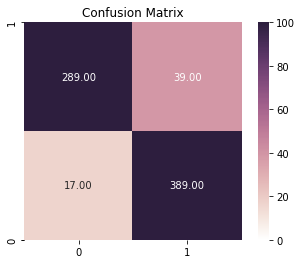

In [29]:
cm = confusion_matrix(y_train, best_rfc.predict(X_train))

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
plt.yticks( [2,0,2],[ '0', '1'],va='center')
plt.title('Confusion Matrix')

In [35]:
print("La précision pour les données d'entrainement est : ")
print(accuracy_score(y_train, best_rfc.predict(X_train)))

La précision pour les données d'entrainement est : 
0.9237057220708447


Text(0.5, 1, 'Confusion Matrix')

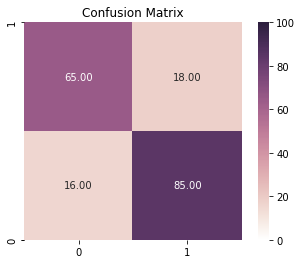

In [30]:
cm = confusion_matrix(y_test, rfc_pred)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
plt.yticks( [2,0,2],[ '0', '1'],va='center')
plt.title('Confusion Matrix')

In [36]:
print("La précision pour les données test est : ")
print(accuracy_score(y_test, rfc_pred))

La précision pour les données test est : 
0.8152173913043478
